In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


2023-04-11 16:32:24.473932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 16:32:25.089057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-11 16:32:25.089110: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-11 16:32:25.089116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

1 Physical GPUs, 1 Logical GPUs


2023-04-11 16:32:25.791172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-11 16:32:25.816993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-11 16:32:25.817153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-11 16:32:25.817725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [1]:
import os


EPOCHS = 100
BATCH_SIZE = 8
ARCH = "bluche"

IMG_SIZE = (128,32, 1)
DATA_ROOT_PATH = "..\\data"
IMAGES_PATH = os.path.join(DATA_ROOT_PATH, "images", "data")
IMAGES_PATH

'..\\data\\images\\data'

In [2]:
vocab = None

with open(os.path.join(DATA_ROOT_PATH, "hindi_vocab.txt"),encoding="utf-8") as f:
  vocab = f.readlines()

idx_to_vocab = {i:value.strip() for i, value in enumerate(vocab)}
vocab_to_idx = {value:key for key, value in idx_to_vocab.items()}

In [3]:
train_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_train.txt"), encoding="utf-8") as f:
  train_data = f.readlines()

In [4]:
valid_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_val.txt"), encoding="utf-8") as f:
  valid_data = f.readlines()

In [5]:
test_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_val.txt"), encoding="utf-8") as f:
  test_data = f.readlines()

In [6]:
charl = None

with open( "charList.txt", encoding="utf-8") as f:
  charl = f.readlines()

In [7]:
charl=charl[0]

In [9]:
for i in range(4000):
    train_data.append(valid_data[i])

In [10]:
len(train_data)

73803

# train data labels

# train data generation

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageOps
from data import preproc as pp

In [11]:

##label generator
def label_g(l):
    label=idx_to_vocab[l]
    z=[]
    for j in range(27):
        z.append(0)
    for k in range(len(label)):
        for r in range(len(charl)):
            if label[k]==charl[r]:
                z[k]=r
    return z   

In [12]:

##label generator
def label_g1(l):
    label=idx_to_vocab[l]
    z=[]
    for k in range(len(label)):
        for r in range(len(charl)):
            if label[k]==charl[r]:
                z.append(r)
    return z   

In [13]:
s=np.zeros((8, 27))
s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageOps
from data import preproc as pp
import cv2

class DataGen(tf.keras.utils.Sequence):
    def __init__(self, data, img_size, batch_size, mode="TRAIN"):
        self.data = data
        self.img_size = img_size
        self.batch_size = batch_size
        self.mode = mode
        
    def __getitem__(self, i):
        start = i * self.batch_size
        end = (i+1) * self.batch_size
        batch_images = np.zeros((self.batch_size, self.img_size[0], self.img_size[1], 1))
        batch_labels = np.zeros((self.batch_size, 27))
        #batch_labels =[[],[],[],[],[],[],[],[]]
        
        for ii, df_index in enumerate(range(start, end)):
            curr_data = self.data[ii].split()
            curr_img_path = curr_data[0]
            #curr_label = idx_to_vocab[int(curr_data[1])]
            curr_label = label_g(int(curr_data[1]))

            curr_img_path = "/".join(curr_img_path.split("/")[2:])
            curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

            
            curr_img = pp.preprocess(curr_img_path, self.img_size)
            curr_img=cv2.adaptiveThreshold(curr_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #curr_img = curr_img.numpy().reshape((self.img_size[0], self.img_size[1],1))
            batch_images[ii, :, :,0] = curr_img 
            batch_labels[ii,:] = curr_label
                    
        if self.mode == "TRAIN":
          return batch_images, batch_labels
        else:
          return batch_images
        
    def __len__(self):
      return len(self.data) // self.batch_size

In [15]:
train_datagen = DataGen(train_data, IMG_SIZE, 8)

In [16]:
valid_datagen=DataGen(valid_data, IMG_SIZE, 8)

In [17]:
test_datagen = DataGen(test_data, IMG_SIZE, 10000)

# model


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.constraints import MaxNorm

from network.layers import FullGatedConv2D, GatedConv2D, OctConv2D
from tensorflow.keras.layers import Conv2D, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, PReLU
from tensorflow.keras.layers import Input, Add, Activation, Lambda, MaxPooling2D, Reshape

In [19]:
from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=ARCH,
                 input_size=IMG_SIZE,
                 vocab_size=110,
                 beam_width=10,
                 stop_tolerance=20,
                 reduce_tolerance=15,
                 reduce_factor=0.1)

model.compile(learning_rate=0.001)

In [20]:
model.fit(x=train_datagen,
          validation_data=valid_datagen,
              epochs=EPOCHS,
              verbose=1)

Epoch 1/100
   9/9225 [..............................] - ETA: 39:17 - loss: 36.5831


KeyboardInterrupt



In [ ]:
curr_data = test_data[56].split()
curr_img_path = curr_data[0]


curr_img_path = "/".join(curr_img_path.split("/")[2:])
curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
curr_img = pp1.preprocess(curr_img_path, IMG_SIZE)

In [233]:
curr_img1.shape

(1, 128, 32)

In [61]:
curr_img1 = np.expand_dims(curr_img, 0)

In [62]:
model.predict(curr_img1)

([array([[56, 61, 62, 21,  3, 23]])], [array([0.32158688], dtype=float32)])

In [63]:
print(charl[56])
print(charl[61])
print(charl[62])
print(charl[21])
print(charl[3])
print(charl[23])

स
ि
ी
क
ं
ग


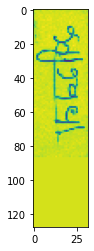

In [64]:
plt.imshow(curr_img)

In [26]:
print(charl[57])
print(charl[60])
print(charl[3])
print(charl[23])
print(charl[21])
print(charl[60])
print(charl[3])
print(charl[23])

ह
ा
ं
ग
क
ा
ं
ग


In [117]:
xt=test_datagen[0][0]
yt=test_datagen[0][1]

ValueError: could not broadcast input array from shape (6,) into shape (27,)

In [84]:
predicts, _ = model.predict(x=xt,
                            ctc_decode=True,
                            verbose=1)

Model Predict
1/1 [==============================] - 2s 2s/step
CTC Decode
1/1 [==============================] - 84s 84s/step


In [96]:
len(predicts[0])

1

In [100]:
predicts[1][0]

[26, 61, 50, 74, 21, 60]

In [101]:
def convert(predicts):
    a=[]
    b=[]
    for i in range(len(predicts)):
        b=[]
        for j in range(len(predicts[i][0])):
            b.append(charl[predicts[i][0][j]])
        a.append(b)
    return a

In [132]:
def convert1(predicts):
    a=[]
    b=[]
    for i in range(len(predicts)):
        b=[]
        for j in range(len(predicts[i])):
            b.append(charl[int(predicts[i][j])])
        a.append(b)
    return a

In [122]:
def trim(yt):
    yt1=[]
    for i in range(len(yt)):
        k=0
        for j in range(26,0,-1):
            if yt[i][j]!=0:
                yt1.append(yt[i][0:j+1])
                k=1
                break
        if k==0:
            yt1.append([0])
    return yt1

In [123]:
yt1=trim(yt)

In [126]:
len(yt1[0])

6

In [125]:
len(yt[0])

27

In [131]:
yt1[0][1]

60.0

In [102]:
predicts1=convert(predicts)

In [133]:
gt=convert1(yt1)

In [139]:
from data import evaluation

In [145]:

import string
import unicodedata
import editdistance
import numpy as np


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):
        '''pd, gt = pd.lower(), gt.lower()

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))
	'''
        pd_cer, gt_cer = list(pd), list(gt)
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))
'''
        pd_wer, gt_wer = pd, gt
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))
        
        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))
        '''
    metrics = [cer, wer]
    metrics = np.mean(metrics, axis=1)

    return metrics

In [146]:
evaluate = ocr_metrics(predicts=predicts1,
                                  ground_truth=gt,)
 
print("Calculate Character Error Rate {} ".format(evaluate[0],))

Calculate Character Error Rate 0.914447951099767, Word Error Rate 0.914447951099767 


In [104]:
predicts1[0]

['व', 'न', 'क', 'ि', 'ा']

# charlist generation
